In [3]:
import os
import time
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

from Dataset_Construction import Balance_Ratio 
from Sampling import label_divide
from AdaClassifier import train_set, multiple_set, print_badC, bad_plot, line_chart, cf_matrix
from AdaRegressor import AUC, PR_curve, multiple_curve, PR_matrix, best_threshold 
from Aging_Score import score1

os.chdir('C:/Users/Darui Yen/OneDrive/桌面/data_after_mid') 
os.getcwd()

'C:\\Users\\Darui Yen\\OneDrive\\桌面\\data_after_mid'

### Bagging model

In [2]:
def ExtraTreesC(train_x, test_x, train_y, test_y, n_estimator = 100, max_features = 'auto', sample_split = 2):
    
    clf = ExtraTreesClassifier(n_estimators = n_estimator, max_features = max_features, min_samples_split = sample_split)
    clf.fit(train_x, train_y)
    predict_y = clf.predict(test_x)
    result = pd.DataFrame({'truth': test_y, 'predict': predict_y})
    
    return result


def ExtraTreesR(train_x, test_x, train_y, test_y, n_estimator = 100, depth = None, max_features = None, sample_split = 2):
    
    clf = ExtraTreesRegressor(n_estimators = n_estimator, max_depth = depth, max_features = max_features,
                              min_samples_split = sample_split)
    clf.fit(train_x, train_y)
    predict_y = clf.predict(test_x)
    result = pd.DataFrame({'truth': test_y, 'predict': predict_y})
    
    return result

### Run all dataset

In [4]:
def runall_ExtraTreesC(num_set, trainset_x, test_x, trainset_y, test_y, record_bad = True):
    
    table_set = pd.DataFrame()
    bad_set = pd.DataFrame()

    for i in range(num_set):
        print('\n', f'Dataset {i}:')
        
        result = ExtraTreesC(trainset_x[f'set{i}'], test_x, trainset_y[f'set{i}'], test_y)
        table = cf_matrix(result, trainset_y[f'set{i}'])
        table_set = pd.concat([table_set, table]).rename(index = {0: f'dataset {i}'})
        
        if record_bad:
            bad_table = print_badC(result, test_x, Bad_Types) 
            bad_set = pd.concat([bad_set, bad_table]).rename(index = {0: f'dataset {i}'})

    if record_bad:
        return table_set, bad_set
    else:
        return table_set
    
    
def runall_ExtraTreesR(num_set, trainset_x, test_x, trainset_y, test_y, thres_target = 'Recall', threshold = 0.8, 
                          record_bad = True):
    
    table_set = pd.DataFrame()
    bad_set = pd.DataFrame()
    pr_dict = {}

    for i in range(num_set):
        print('\n', f'Dataset {i}:')

        predict = ExtraTreesR(trainset_x[f'set{i}'], test_x, trainset_y[f'set{i}'], test_y)
        pr_matrix = PR_matrix(predict, trainset_y[f'set{i}'])
        pr_dict[f'set{i}'] = pr_matrix
        
        best_data, best_thres = best_threshold(pr_matrix, target = thres_target, threshold = threshold)
        table_set = pd.concat([table_set, best_data]).rename(index = {best_data.index.values[0]: f'dataset {i}'})
        
        if record_bad:
            bad_table = print_badC(predict, test_x, Bad_Types, threshold = best_thres)
            bad_set = pd.concat([bad_set, bad_table]).rename(index = {0: f'dataset {i}'})
    
    if record_bad:
        return pr_dict, table_set, bad_set
    else:
        return pr_dict, table_set

## Data Processing

In [5]:
###bad types###
bad = pd.read_csv('original_data/Bad_Types.csv').iloc[:, 1:]
Bad_Types = {bad.cb[i]:i for i in range (len(bad))}
print('Total bad types:', len(bad))

###single dataset###
test = pd.read_csv('original_data/TestingSet_0.csv').iloc[:, 2:]
train = pd.read_csv('original_data/TrainingSet_new.csv').iloc[:, 2:]
print('\ntraining data:', train.shape, '\nBalance Ratio:', Balance_Ratio(train))
print('\ntesting data:', test.shape, '\nBalance Ratio:', Balance_Ratio(test))

train_x, train_y, test_x, test_y = label_divide(train, test, 'GB')

###multiple dataset###
data_dict = multiple_set(num_set = 9)
trainset_x, trainset_y = train_set(data_dict, num_set = 9, label = 'GB')
test_x, test_y = label_divide(test, None, 'GB', train_only = True)

Total bad types: 62

training data: (77138, 83) 
Balance Ratio: 18.17902

testing data: (55903, 83) 
Balance Ratio: 3104.72222
Dimension of dataset 0 : (77138, 83)  balance ratio: 18.17902
Dimension of dataset 1 : (139322, 83)  balance ratio: 1.10437
Dimension of dataset 2 : (139322, 83)  balance ratio: 1.10437
Dimension of dataset 3 : (139322, 83)  balance ratio: 1.10437
Dimension of dataset 4 : (138920, 83)  balance ratio: 1.11112
Dimension of dataset 5 : (19506, 83)  balance ratio: 1.06391
Dimension of dataset 6 : (19506, 83)  balance ratio: 1.06391
Dimension of dataset 7 : (19506, 83)  balance ratio: 1.06391
Dimension of dataset 8 : (19104, 83)  balance ratio: 1.11117

 9 datasets are loaded.

Labels of  9 datasets are divided.



 Dataset 0:
Precision: 0.0 
Recall: 0.0 
Aging Rate: 0.018710981521564137
Types of Bad found: []
Types of Bad not found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]

 Dataset 1:
Precision: 0.0 
Recall: 0.0 
Aging Rate: 0.018621540883315742
Types of Bad found: []
Types of Bad not found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]

 Dataset 2:
Precision: 0.0 
Recall: 0.0 
Aging Rate: 0.018710981521564137
Types of Bad found: []
Types of Bad not found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]

 Dataset 3:
Precision: 0.0 
Recall: 0.0 
Aging Rate: 0.019086632202207396
Types of Bad found: []
Types of Bad not found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]

 Dataset 4:
Precision: 0.0 
Recall: 0.0 
Aging Rate: 0.018710981521564137
Types of Bad found: []
Types of Bad not found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]

 Dataset 5:
Precision: 0.0 
Recall: 0.0 
Aging Rate: 0

C:\Users\Darui Yen\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Darui Yen\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


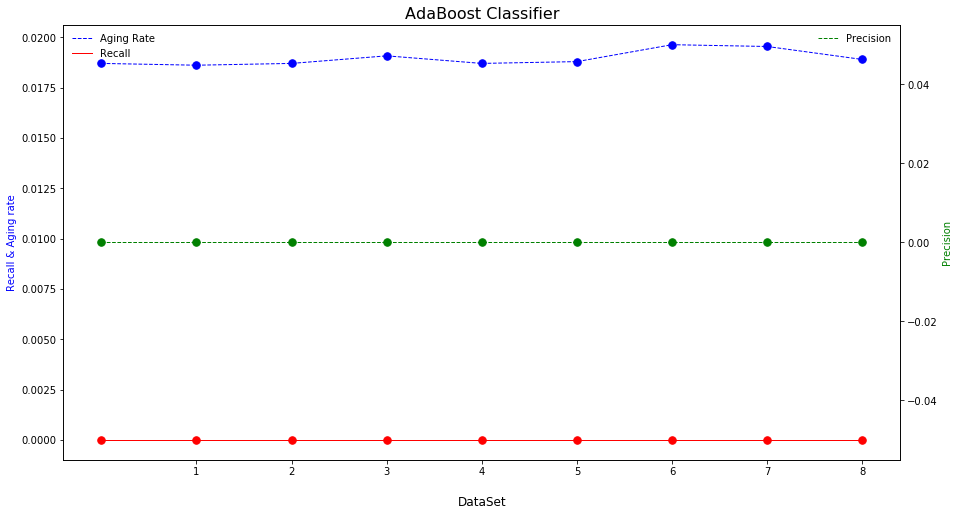

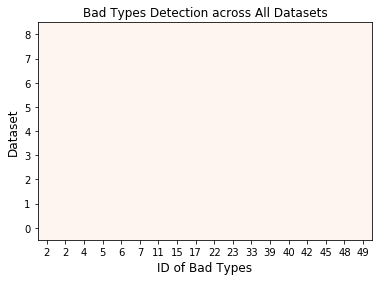


Run Time：104.308737 seconds


In [6]:
start = time.time()

table_set1, bad_set1 = runall_ExtraTreesC(9, trainset_x, test_x, trainset_y, test_y)
line_chart(table_set1)
bad_plot(bad_set1)

end = time.time()
print("\nRun Time：%f seconds" % (end - start))

In [7]:
table_set1

,Balance Ratio,Train_OK,Train_NG,TP,FP,FN,TN,Precision,Recall,Aging Rate,Efficiency,Score
dataset 0,18.179015,73116.0,4022.0,0.0,1046.0,18.0,54839.0,0.0,0.0,0.018711,0.0,0.0
dataset 1,1.104371,73116.0,66206.0,0.0,1041.0,18.0,54844.0,0.0,0.0,0.018622,0.0,0.0
dataset 2,1.104371,73116.0,66206.0,0.0,1046.0,18.0,54839.0,0.0,0.0,0.018711,0.0,0.0
dataset 3,1.104371,73116.0,66206.0,0.0,1067.0,18.0,54818.0,0.0,0.0,0.019087,0.0,0.0
dataset 4,1.111118,73116.0,65804.0,0.0,1046.0,18.0,54839.0,0.0,0.0,0.018711,0.0,0.0
dataset 5,1.063909,10055.0,9451.0,0.0,1051.0,18.0,54834.0,0.0,0.0,0.018800,0.0,0.0
dataset 6,1.063909,10055.0,9451.0,0.0,1098.0,18.0,54787.0,0.0,0.0,0.019641,0.0,0.0
dataset 7,1.063909,10055.0,9451.0,0.0,1093.0,18.0,54792.0,0.0,0.0,0.019552,0.0,0.0
dataset 8,1.111173,10055.0,9049.0,0.0,1057.0,18.0,54828.0,0.0,0.0,0.018908,0.0,0.0



 Dataset 0:
Best Threshold: 0.0 

Recall: [1.] ,   Precision: [0.00032199] ,   Aging Rate: [1.]
Types of Bad found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]
Types of Bad not found: []

 Dataset 1:
Best Threshold: 0.0 

Recall: [1.] ,   Precision: [0.00032199] ,   Aging Rate: [1.]
Types of Bad found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]
Types of Bad not found: []

 Dataset 2:
Best Threshold: 0.0 

Recall: [1.] ,   Precision: [0.00032199] ,   Aging Rate: [1.]
Types of Bad found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]
Types of Bad not found: []

 Dataset 3:
Best Threshold: 0.0 

Recall: [1.] ,   Precision: [0.00032199] ,   Aging Rate: [1.]
Types of Bad found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]
Types of Bad not found: []

 Dataset 4:
Best Threshold: 0.0 

Recall: [1.] ,   Precision: [0.00032199] ,   Aging Rate: [1.]
Types of Bad found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 

C:\Users\Darui Yen\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Darui Yen\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


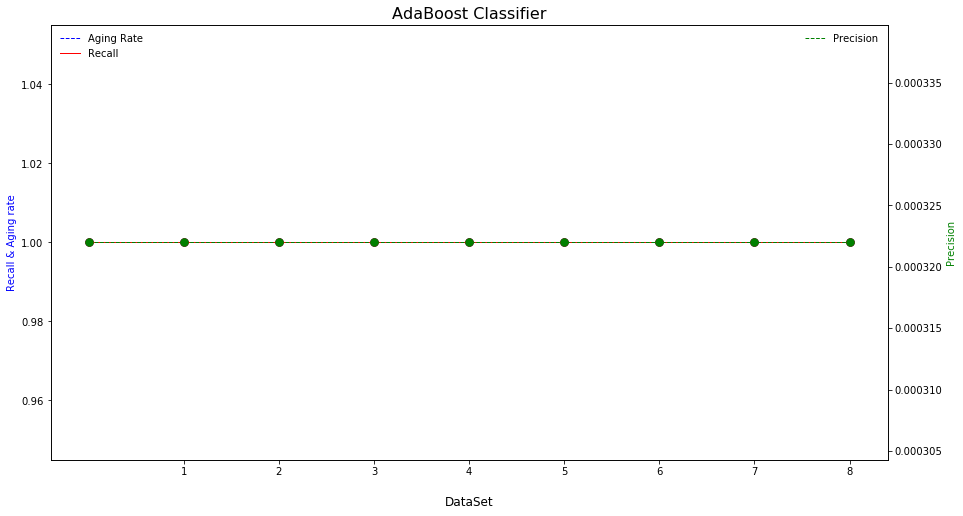

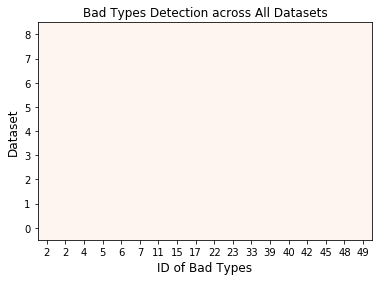


Run Time：217.418636 seconds


In [8]:
start = time.time()

pr_dict, table_set2, bad_set2 = runall_ExtraTreesR(9, trainset_x, test_x, trainset_y, test_y, thres_target = 'Recall', 
                                                   threshold = 0.8)
line_chart(table_set2)
bad_plot(bad_set2)

end = time.time()
print("\nRun Time：%f seconds" % (end - start))

,Class_Prob,train_OK,train_NG,Balance Ratio,TP,FP,FN,TN,Recall,Precision,Aging Rate,Efficiency,Score
dataset 0,0.031089,73116.0,4022.0,18.179015,18.0,55885.0,0.0,0.0,1.000000,0.000322,1.000000,1.000000,0.000000
dataset 1,0.270121,73116.0,66206.0,1.104371,18.0,55885.0,0.0,0.0,1.000000,0.000322,1.000000,1.000000,0.000000
dataset 2,0.272562,73116.0,66206.0,1.104371,18.0,55885.0,0.0,0.0,1.000000,0.000322,1.000000,1.000000,0.000000
dataset 3,0.185801,73116.0,66206.0,1.104371,18.0,55885.0,0.0,0.0,1.000000,0.000322,1.000000,1.000000,0.000000
dataset 4,0.272067,73116.0,65804.0,1.111118,18.0,55885.0,0.0,0.0,1.000000,0.000322,1.000000,1.000000,0.000000
dataset 5,0.302740,10055.0,9451.0,1.063909,15.0,42363.0,3.0,13522.0,0.833333,0.000354,0.758063,1.099293,0.618000
dataset 6,0.300850,10055.0,9451.0,1.063909,15.0,41860.0,3.0,14025.0,0.833333,0.000358,0.749065,1.112498,0.623226
dataset 7,0.229892,10055.0,9451.0,1.063909,18.0,55885.0,0.0,0.0,1.000000,0.000322,1.000000,1.000000,0.000000
dataset 8,0.263681,10055.0,9049.0,1.111173,17.0,54781.0,1.0,1104.0,0.944444,0.000310,0.980234,0.963489,0.000000


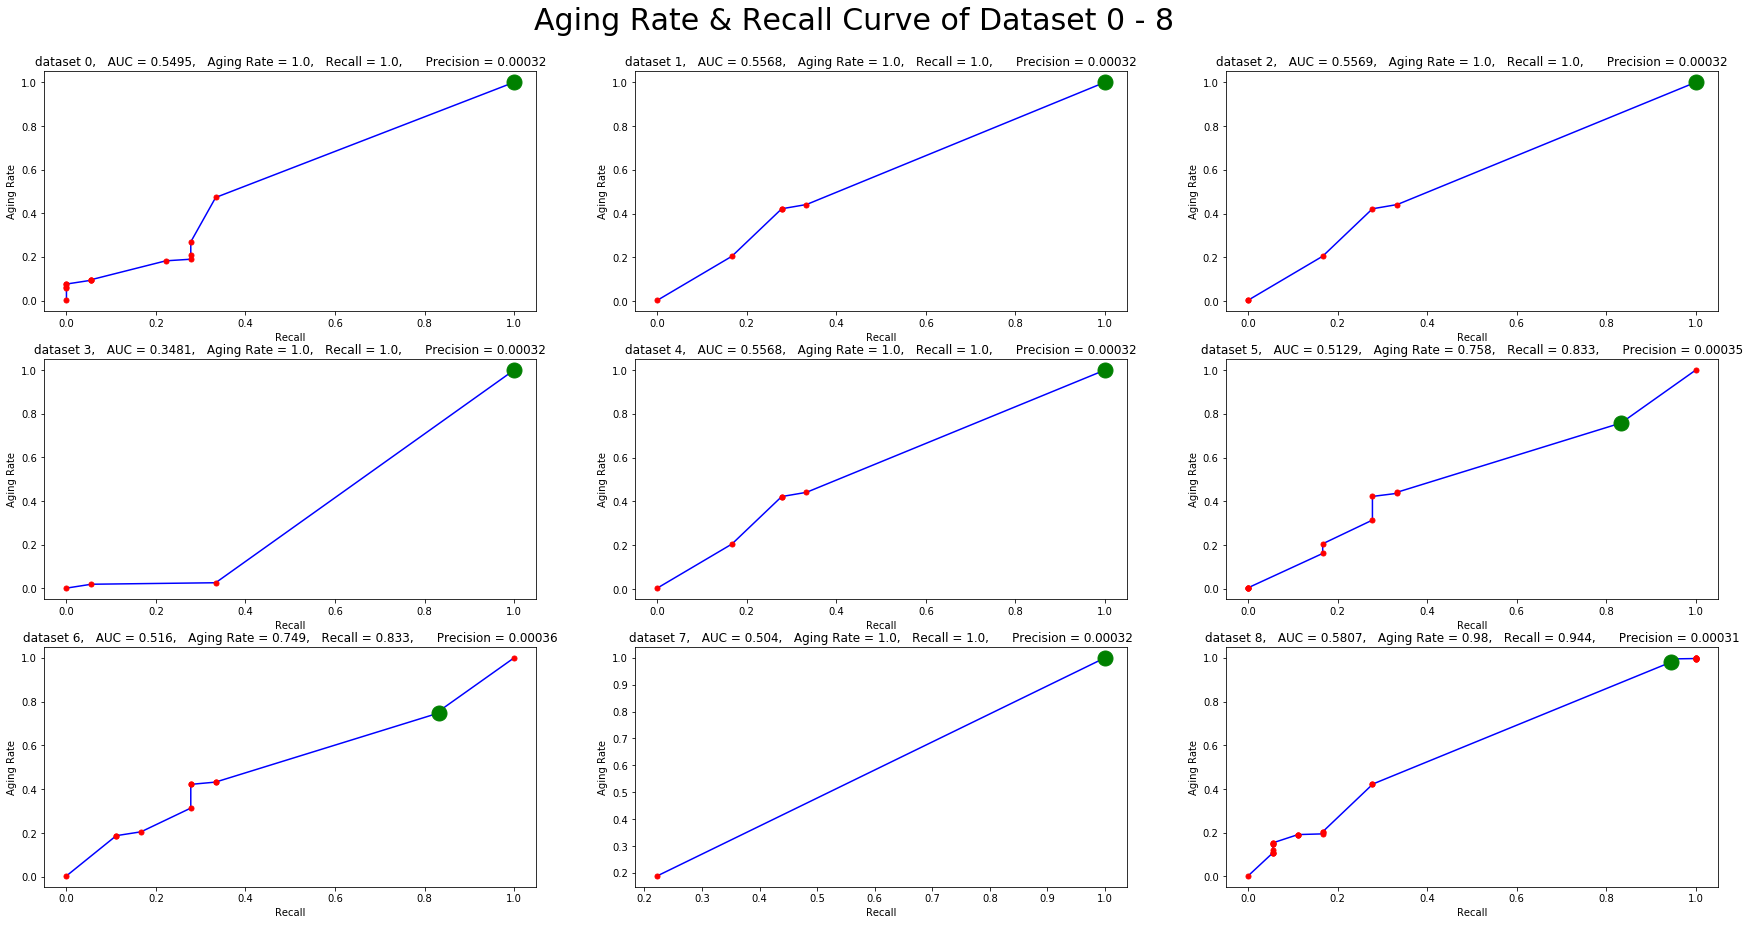

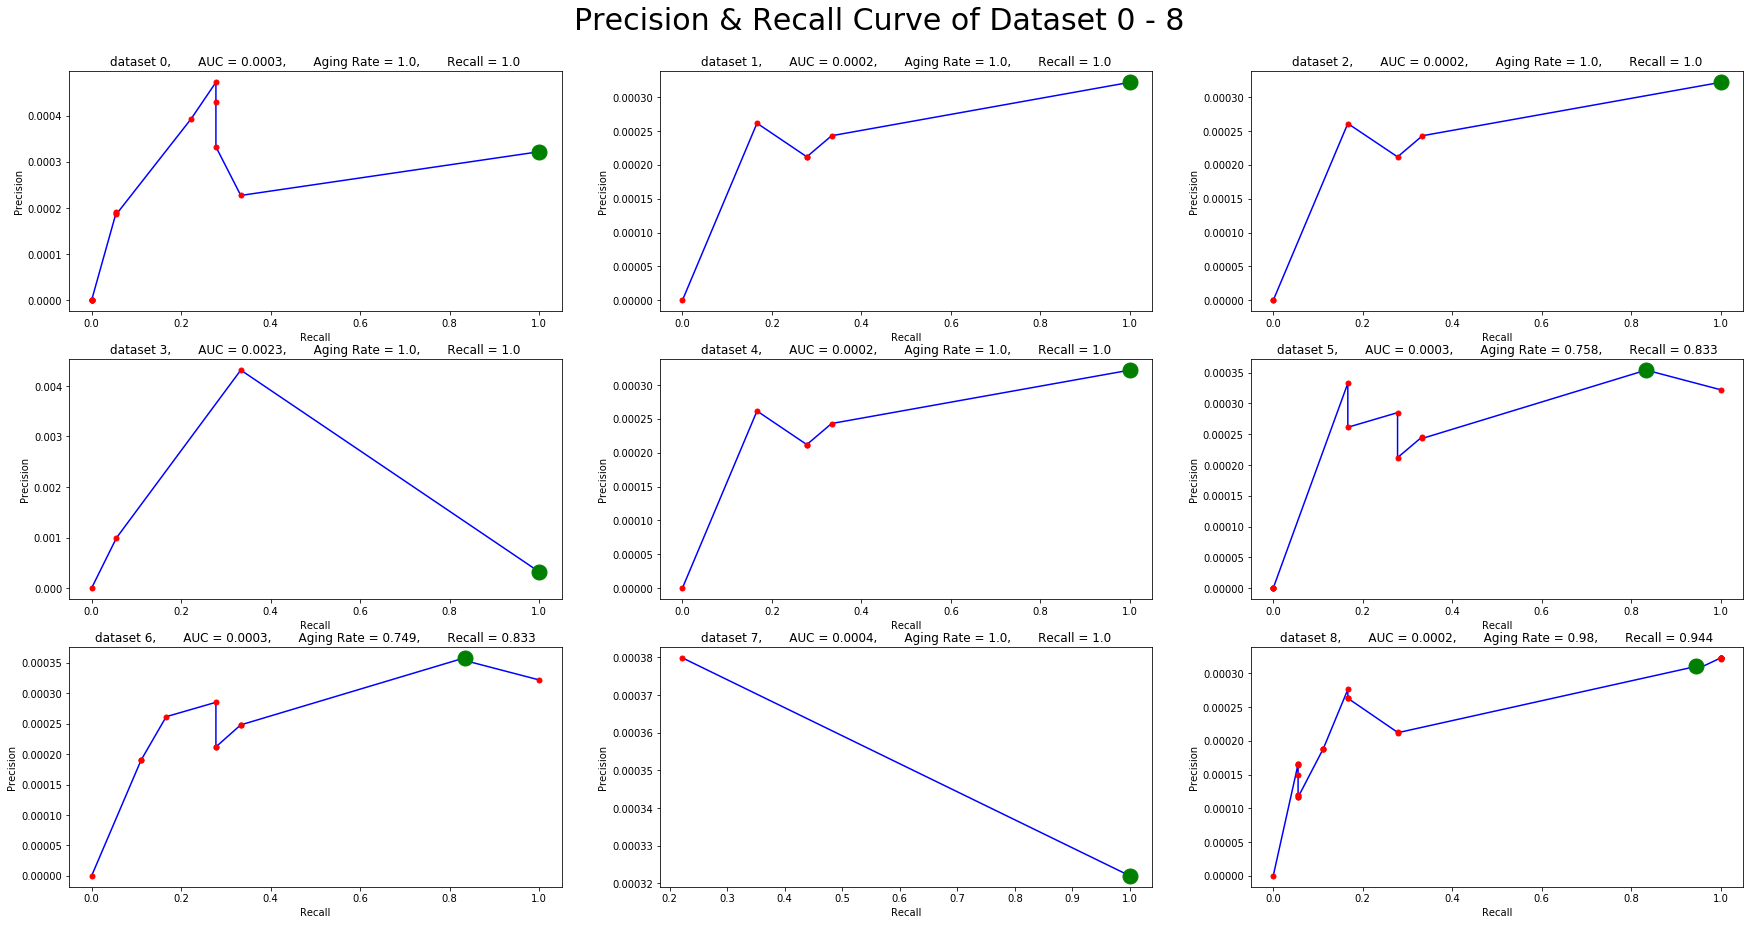

In [15]:
multiple_curve(3, 3, pr_dict, table_set2, target = 'Aging Rate')
multiple_curve(3, 3, pr_dict, table_set2, target = 'Precision')
table_set2